#Contexto del análisis de uber

Se busca encontrar que categoria y que proposito son los que mas se repiten

In [ ]:
import pandas as pd

In [ ]:
uber_df = pd.read_csv("UberDataset.csv")

In [ ]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Columnas:

    START_DATE: Fecha y hora de inicio del viaje.
    END_DATE: Fecha y hora de finalización del viaje.
    CATEGORY: Categoría del viaje (e.g., "Business").
    START: Ubicación de inicio.
    STOP: Ubicación de destino.
    MILES: Distancia recorrida (en millas).
    PURPOSE: Propósito del viaje (e.g., "Meeting", "Meal/Entertain").

##Limpieza de datos

In [ ]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
# 1156 filas, 7 columnas
uber_df.shape

(1156, 7)

In [ ]:
# Análisis de nulos
uber_df.isna().sum().sort_values(ascending = False)

,0
PURPOSE,503
END_DATE,1
CATEGORY,1
START,1
STOP,1
START_DATE,0
MILES,0


In [ ]:
# Purpose tiene 503 datos nulos , son demasiados, por lo tanto se eliminan esas filas
uber_df.dropna(subset=["PURPOSE"],inplace = True)

In [ ]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  653 non-null    object 
 1   END_DATE    653 non-null    object 
 2   CATEGORY    653 non-null    object 
 3   START       653 non-null    object 
 4   STOP        653 non-null    object 
 5   MILES       653 non-null    float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [ ]:
#Revisar formatos de fecha para las columnas "START_DATE" y "END_DATE"
fechas = uber_df[["START_DATE","END_DATE"]]
fechas.head()
fechas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  653 non-null    object
 1   END_DATE    653 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


In [ ]:
#La hora de las columnas "START_DATE" y "END_DATE" deberían estar en columnas distintas, "START_TIME" y "END_TIME"
hora_inicio = fechas["START_DATE"].str.split(" ", expand = True)
hora_fin = fechas["END_DATE"].str.split(" ", expand = True)

In [ ]:
hora_inicio

,0,1
0,01-01-2016,21:11
2,01-02-2016,20:25
3,01-05-2016,17:31
4,01-06-2016,14:42
5,01-06-2016,17:15
...,...,...
1150,12/31/2016,1:07
1151,12/31/2016,13:24
1152,12/31/2016,15:03
1153,12/31/2016,21:32


In [ ]:
#Las columnas "START_DATE" y "END_DATE" solo tendrán las fechas
fecha_inicio = hora_inicio[0]
fecha_fin = hora_fin[0]

In [ ]:
#Se deben cambiar las horas de las columnas "STAR_DATE" y "END_DATE" de uber_df por los valores de fecha_inicio y fecha_fin
#, además de agregar las nuevas columnas "START_TIME" y "END_TIME" con los valores contenidos en hora_inicio y hora_fin , el nuevo df se llamará uber_limpio
uber_limpio = uber_df.copy()
uber_limpio["START_DATE"] = fecha_inicio
uber_limpio["END_DATE"] = fecha_fin
uber_limpio["START_TIME"] = hora_inicio[1]
uber_limpio["END_TIME"] = hora_fin[1]
uber_limpio

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_TIME,END_TIME
0,01-01-2016,01-01-2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
2,01-02-2016,01-02-2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,01-05-2016,01-05-2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,01-06-2016,01-06-2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
5,01-06-2016,01-06-2016,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17:15,17:19
...,...,...,...,...,...,...,...,...,...
1150,12/31/2016,12/31/2016,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14
1151,12/31/2016,12/31/2016,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13:24,13:42
1152,12/31/2016,12/31/2016,Business,Unknown Location,Unknown Location,16.2,Meeting,15:03,15:38
1153,12/31/2016,12/31/2016,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50


In [ ]:
uber_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  653 non-null    object 
 1   END_DATE    653 non-null    object 
 2   CATEGORY    653 non-null    object 
 3   START       653 non-null    object 
 4   STOP        653 non-null    object 
 5   MILES       653 non-null    float64
 6   PURPOSE     653 non-null    object 
 7   START_TIME  653 non-null    object 
 8   END_TIME    653 non-null    object 
dtypes: float64(1), object(8)
memory usage: 67.2+ KB


In [ ]:
#Las fechas deben tener todas el formato dd-mm-yyyy , algunas están con formato dd/mm/yyyy lo cual no es consistente
uber_limpio["START_DATE"].replace({"/":"-"}, regex = True, inplace = True)
uber_limpio["END_DATE"].replace({"/":"-"}, regex = True, inplace = True)


<ipython-input-203-c661f575daed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_limpio["START_DATE"].replace({"/":"-"}, regex = True, inplace = True)
<ipython-input-203-c661f575daed>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
uber_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  653 non-null    object 
 1   END_DATE    653 non-null    object 
 2   CATEGORY    653 non-null    object 
 3   START       653 non-null    object 
 4   STOP        653 non-null    object 
 5   MILES       653 non-null    float64
 6   PURPOSE     653 non-null    object 
 7   START_TIME  653 non-null    object 
 8   END_TIME    653 non-null    object 
dtypes: float64(1), object(8)
memory usage: 67.2+ KB


In [ ]:
uber_limpio['START_DATE']

,START_DATE
0,01-01-2016
2,01-02-2016
3,01-05-2016
4,01-06-2016
5,01-06-2016
...,...
1150,12-31-2016
1151,12-31-2016
1152,12-31-2016
1153,12-31-2016


In [ ]:
#Ajustar el formato de las fechas a date time
uber_limpio["START_DATE"] = pd.to_datetime(uber_limpio["START_DATE"])
uber_limpio["END_DATE"] = pd.to_datetime(uber_limpio["END_DATE"])

In [ ]:
#Ajustar el formato de los tiempos
uber_limpio["START_TIME"] = pd.to_datetime(uber_limpio["START_TIME"], format="%H:%M")
uber_limpio["END_TIME"] = pd.to_datetime(uber_limpio["END_TIME"], format="%H:%M")


In [ ]:
uber_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  653 non-null    datetime64[ns]
 1   END_DATE    653 non-null    datetime64[ns]
 2   CATEGORY    653 non-null    object        
 3   START       653 non-null    object        
 4   STOP        653 non-null    object        
 5   MILES       653 non-null    float64       
 6   PURPOSE     653 non-null    object        
 7   START_TIME  653 non-null    datetime64[ns]
 8   END_TIME    653 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 67.2+ KB


In [ ]:
uber_limpio['START_TIME']

,START_TIME
0,1900-01-01 21:11:00
2,1900-01-01 20:25:00
3,1900-01-01 17:31:00
4,1900-01-01 14:42:00
5,1900-01-01 17:15:00
...,...
1150,1900-01-01 01:07:00
1151,1900-01-01 13:24:00
1152,1900-01-01 15:03:00
1153,1900-01-01 21:32:00


##Análisis exploratorio de datos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

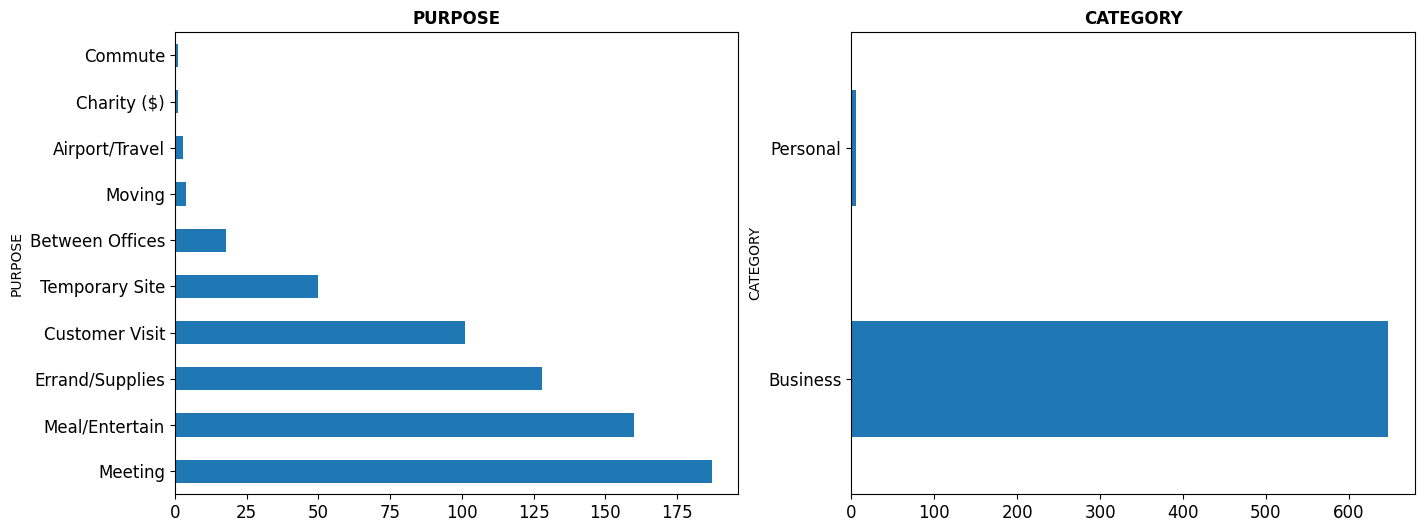

In [ ]:
graficos_eda_categoricos(uber_limpio[["PURPOSE","CATEGORY"]])

#Variables Categóricas "PURPOSE" y "CATEGORY"

La variable categórica "PURPOSE" indica el propósito del viaje, en este caso el top 3 es:



*   Meeting (Reunion)
*   Entretenimiento
*   Compras

La variable categórica "CATEGORY" indica la categoría del viaje, en este caso la variable que mas se repite es "Business".



#Análisis de Patrones temporales "START_DATE" y "END_DATE"

In [ ]:
#Rango Temporal

print("Rango de START_DATE:", uber_limpio["START_DATE"].min(), "a", uber_limpio["START_DATE"].max())
print("Rango de END_DATE:", uber_limpio["END_DATE"].min(), "a", uber_limpio["END_DATE"].max())

Rango de START_DATE: 2016-01-01 00:00:00 a 2016-12-31 00:00:00
Rango de END_DATE: 2016-01-01 00:00:00 a 2016-12-31 00:00:00


In [ ]:
#Frecuencia de datos por fecha

start_date_counts = uber_limpio["START_DATE"].value_counts().sort_index()
end_date_counts = uber_limpio["END_DATE"].value_counts().sort_index()

In [ ]:
#Agrupacion por periodos de tiempo

#Días

uber_limpio["DAY_OF_WEEK"] = uber_limpio["START_DATE"].dt.day_name()
print(uber_limpio["DAY_OF_WEEK"].value_counts())


DAY_OF_WEEK
Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64


In [ ]:
#Meses
uber_limpio["MONTH"] = uber_limpio["START_DATE"].dt.month_name()
print(uber_limpio["MONTH"].value_counts())

MONTH
December    134
February     82
June         73
March        71
November     60
January      59
April        50
May          46
July         46
October      20
August       12
Name: count, dtype: int64


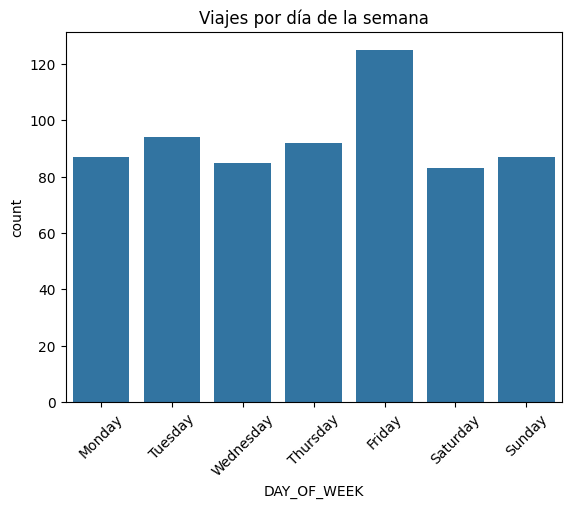

In [ ]:
import seaborn as sns

#Distribución por días de la semana
sns.countplot(data=uber_limpio, x="DAY_OF_WEEK", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Viajes por día de la semana")
plt.xticks(rotation=45)
plt.show()


La distribución diaria indica que el día viernes son lo que mas frecuencia de viaje tiene (como es de esperarse)

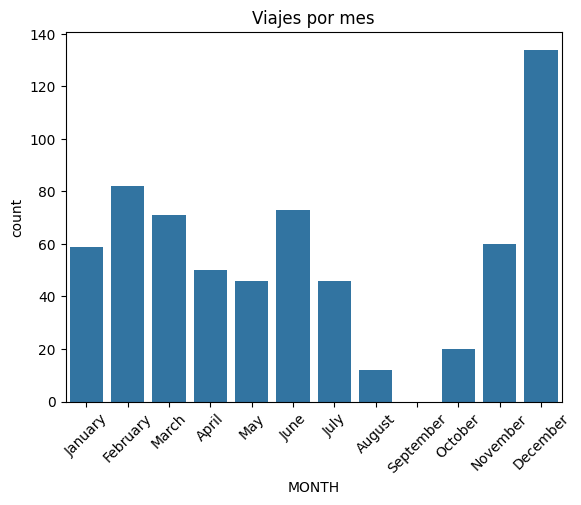

In [ ]:
#Distribución mensual
sns.countplot(data=uber_limpio, x="MONTH", order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.title("Viajes por mes")
plt.xticks(rotation=45)
plt.show()


La ditribución mensual indica que el mes con mayor actividad es Diciembre, pero a su vez se muestra que Septiembre no registra actividades

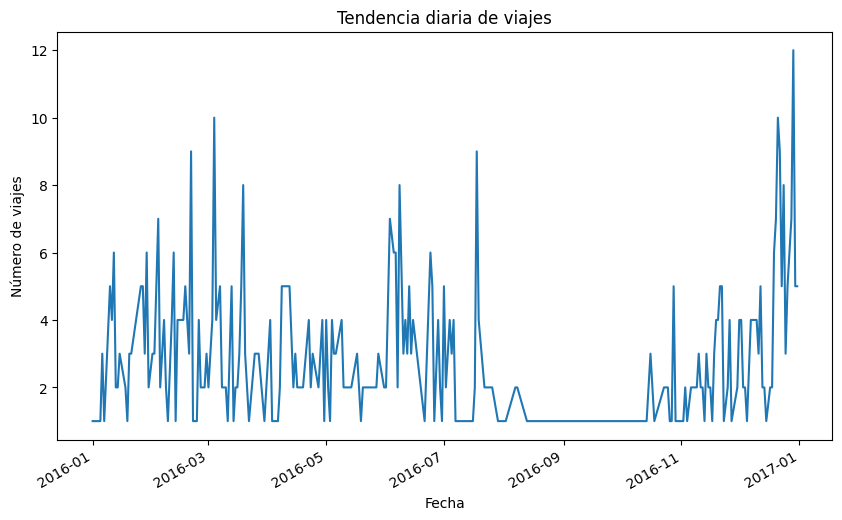

In [ ]:
daily_trips = uber_limpio.groupby("START_DATE").size()
daily_trips.plot(figsize=(10, 6))
plt.title("Tendencia diaria de viajes")
plt.ylabel("Número de viajes")
plt.xlabel("Fecha")
plt.show()

##Tiempo de duración de los viajes

In [ ]:
import numpy as np

# Agregar un día a los tiempos que cruzan la medianoche
uber_limpio["END_TIME_ADJUSTED"] = np.where(
    uber_limpio["END_TIME"] < uber_limpio["START_TIME"],
    uber_limpio["END_TIME"] + pd.Timedelta(days=1),
    uber_limpio["END_TIME"]
)

# Calcular la duración
uber_limpio["DURATION"] = (uber_limpio["END_TIME_ADJUSTED"] - uber_limpio["START_TIME"]).dt.total_seconds() / 60  # En minutos


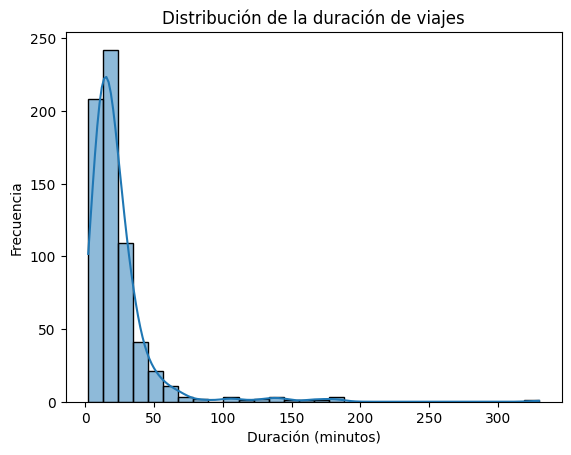

In [ ]:
sns.histplot(uber_limpio["DURATION"], bins=30, kde=True)
plt.title("Distribución de la duración de viajes")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()

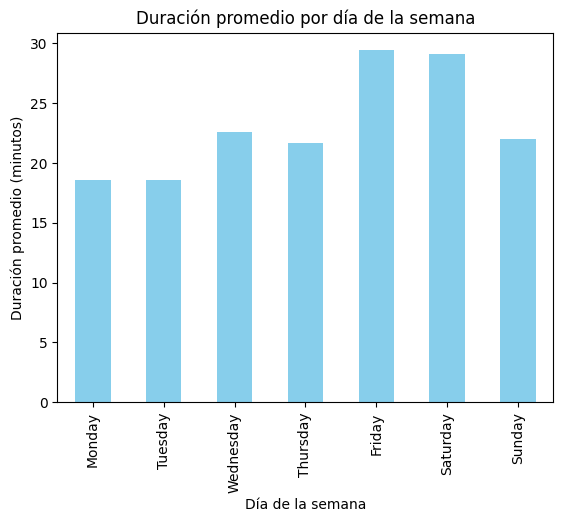

In [ ]:
duration_by_day = uber_limpio.groupby("DAY_OF_WEEK")["DURATION"].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
duration_by_day.plot(kind="bar", color="skyblue")
plt.title("Duración promedio por día de la semana")
plt.ylabel("Duración promedio (minutos)")
plt.xlabel("Día de la semana")
plt.show()


El rango de tiempo de los viaje oscila entre los 18 y 30 minutos, siendo el viernes y sábado los días con mas tiempo de duración en los viajes.

#Analisis variables númericas

In [ ]:
#Analisis estadistico de la variable numerica "MILES"
uber_limpio["MILES"].describe()

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


El análisis estadistico indica lo siguiente:



1.   En promedio se recorrió un total de 11,2 millas.
2.   La desviación estandar indica una alta variabilidad en los viajes,por lo tanto hay valores que son significativamente mas largo o cortos que otros , alejandose de la media
3. El valor máximo muestra un viaje de 310 millas, lo cual indica un valor atípico
4. La media (11.196 millas) es mayor que la mediana (6.4 millas), lo que sugiere que existen valores extremos (outliers) hacia el lado de las distancias largas, como el viaje de 310.3 millas.



Identificar outliers

In [ ]:
IQR = 10.4 - 3.2
upper_bound = 10.4 + 1.5 * IQR
outliers = uber_limpio[uber_limpio["MILES"] > upper_bound]


<Axes: ylabel='MILES'>

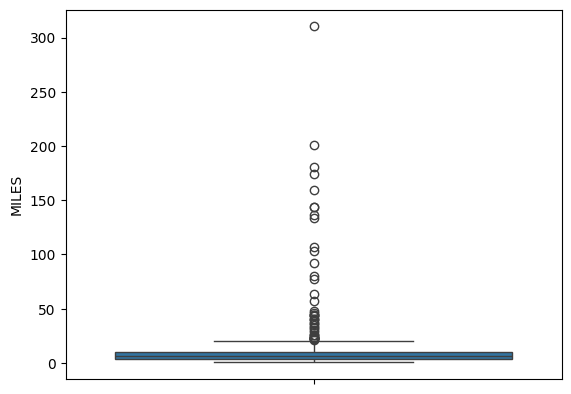

In [ ]:

sns.boxplot(y=uber_limpio["MILES"])


In [ ]:
uber_limpio['START_TIME']

,START_TIME
0,1900-01-01 21:11:00
2,1900-01-01 20:25:00
3,1900-01-01 17:31:00
4,1900-01-01 14:42:00
5,1900-01-01 17:15:00
...,...
1150,1900-01-01 01:07:00
1151,1900-01-01 13:24:00
1152,1900-01-01 15:03:00
1153,1900-01-01 21:32:00


In [ ]:
#Re formatear START_TIME y END_TIME para que solo tengan las horas
uber_limpio["START_TIME"] = pd.to_datetime(uber_limpio["START_TIME"], format="%H:%M").dt.time
uber_limpio["END_TIME"] = pd.to_datetime(uber_limpio["END_TIME"], format="%H:%M").dt.time

In [ ]:
uber_limpio['START_TIME']

,START_TIME
0,21:11:00
2,20:25:00
3,17:31:00
4,14:42:00
5,17:15:00
...,...
1150,01:07:00
1151,13:24:00
1152,15:03:00
1153,21:32:00


In [ ]:
#Descarga del archivo para realizar el dashboard

from google.colab import files

uber_limpio.to_excel('uber_dashboard.xlsx')
files.download('uber_dashboard.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>